In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Part One

In [2]:
#1. Import and warehouse data:
n=pd.read_csv('Part1 - Normal.csv')
h=pd.read_csv('Part1 - Type_H.csv')
s=pd.read_csv('Part1 - Type_S.csv')
print(f'Shape of Normal: {n.shape}\n{n.head()}\n\nShape of Type_H: {h.shape}\n{h.head()}\n\nShape of Type_S: {s.shape}\n{s.head()}\n')

Shape of Normal: (100, 7)
   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

Shape of Type_H: (60, 7)
   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

Shape

In [3]:
d=pd.concat([n,h,s],ignore_index=True)
print('Final shape:',d.shape)
d

Final shape: (310, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [4]:
#2. Data cleansing:
print(d.isnull().sum())
d.info()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
d.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [6]:
d.loc[d['Class']=='Nrmal','Class']='Normal'
d.loc[d['Class']=='tp_s','Class']='Type_S'
d.loc[d['Class']=='type_h','Class']='Type_H'
d.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [7]:
#3. Data analysis & visualisation:
d.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


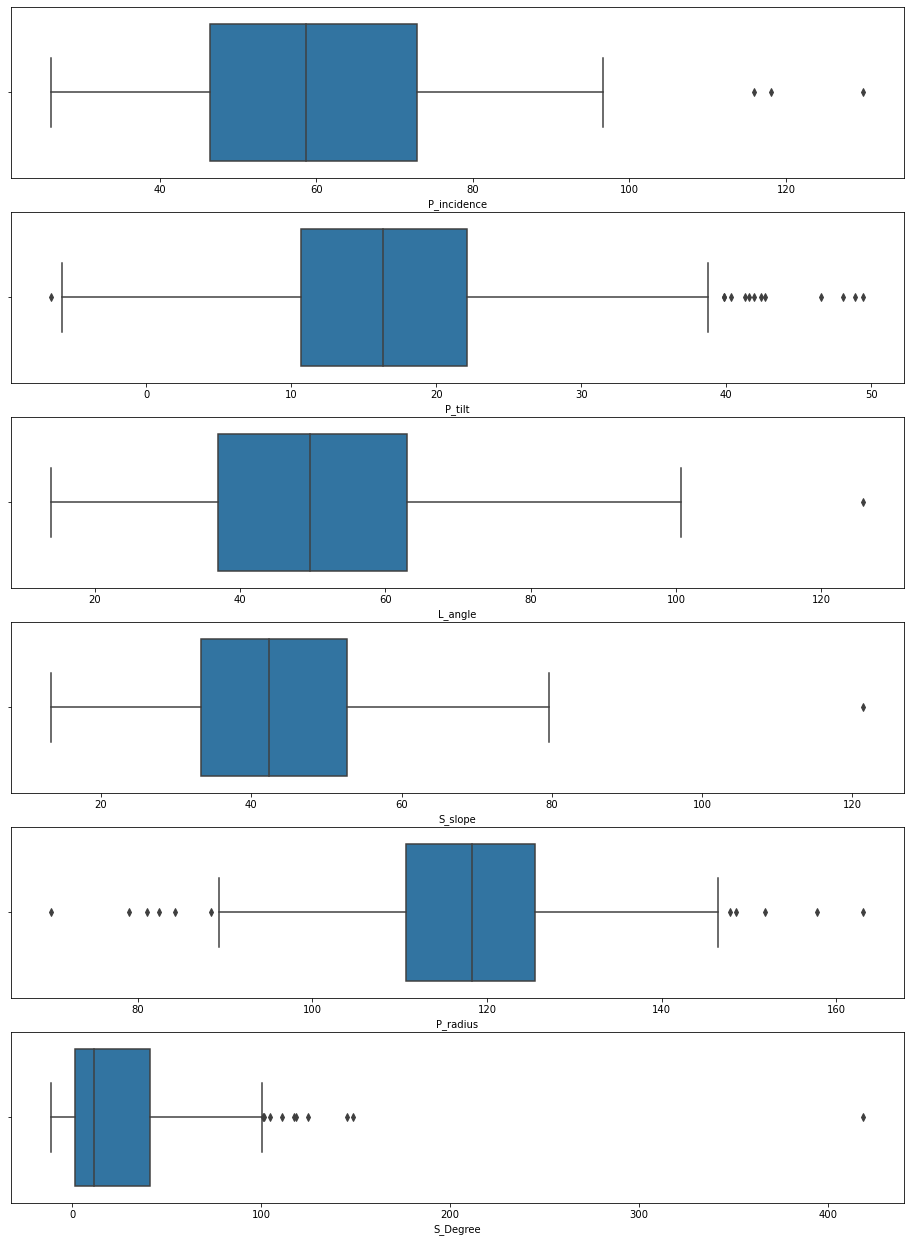

All except S_Degree are almost normally distributed


In [8]:
import matplotlib.pyplot as plt
f,a=plt.subplots(6,figsize=(16,22))
for i in range(6):
    b= sns.boxplot(x=d.iloc[:,i],ax=a[i])
plt.show()
print('All except S_Degree are almost normally distributed')

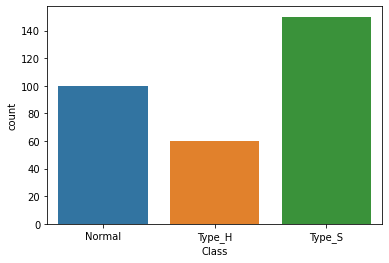

In [9]:
sns.countplot(x=d.Class)

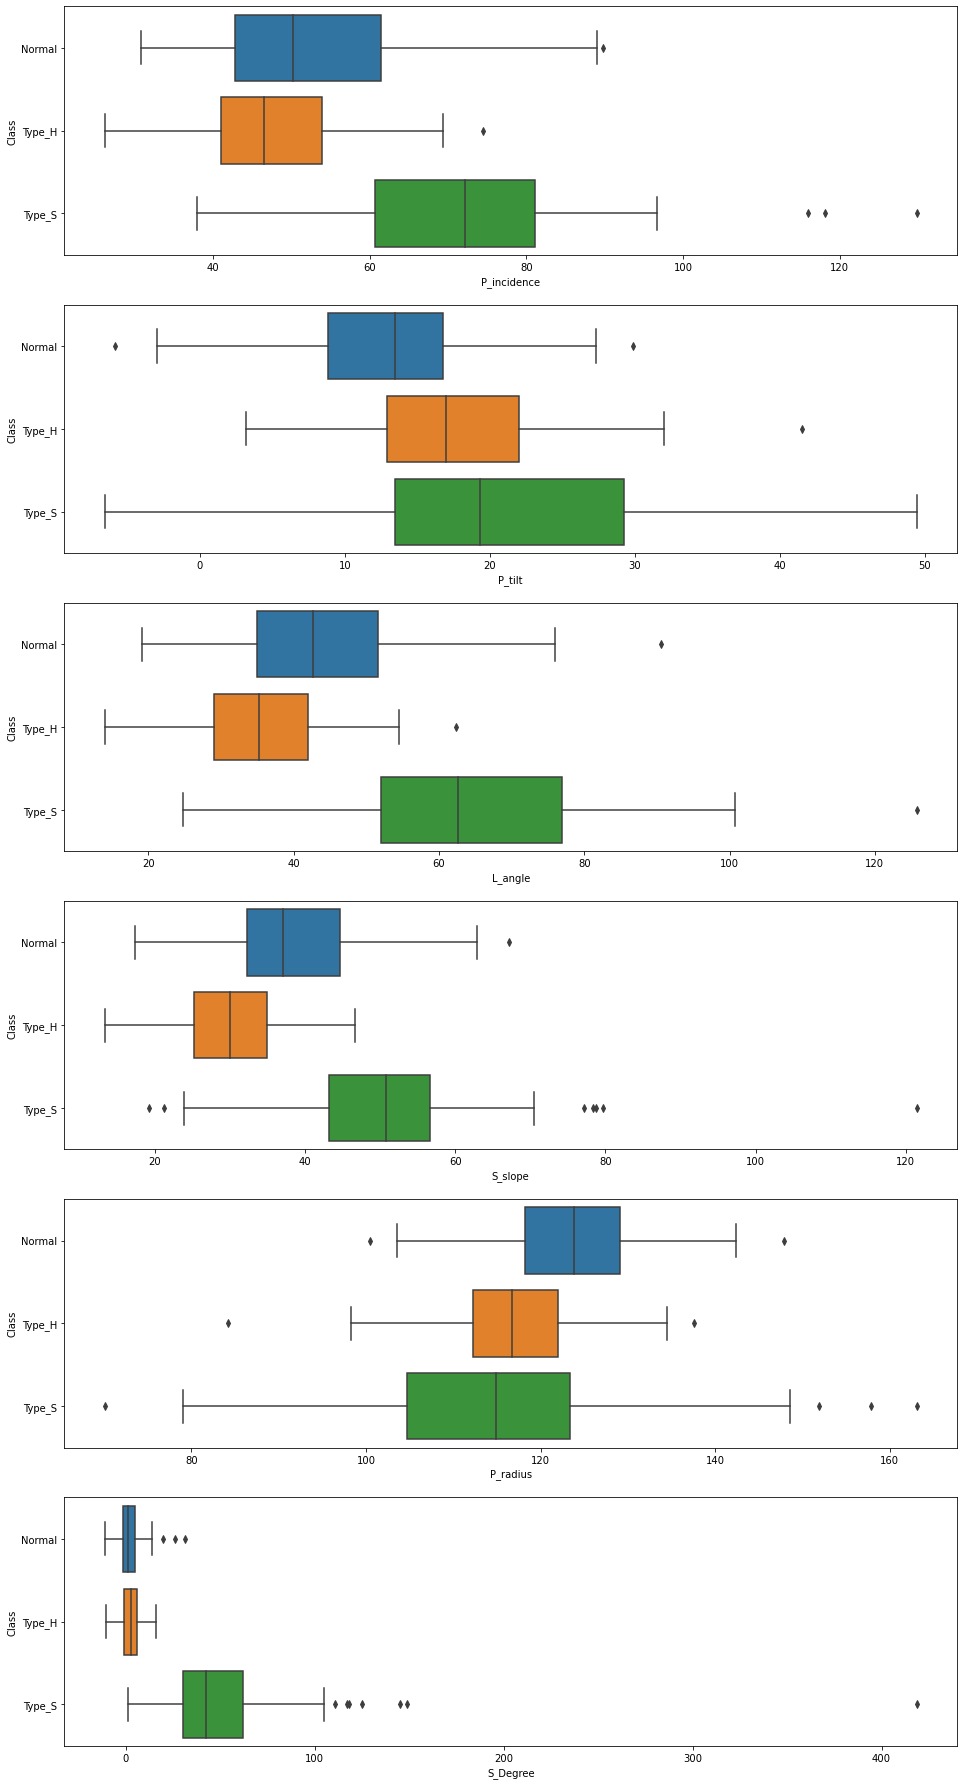

In [10]:
f,a=plt.subplots(6,figsize=(16,32))
for i in range(6):
    sns.boxplot(x=d.columns[i],y='Class',data=d,ax=a[i])
plt.show()

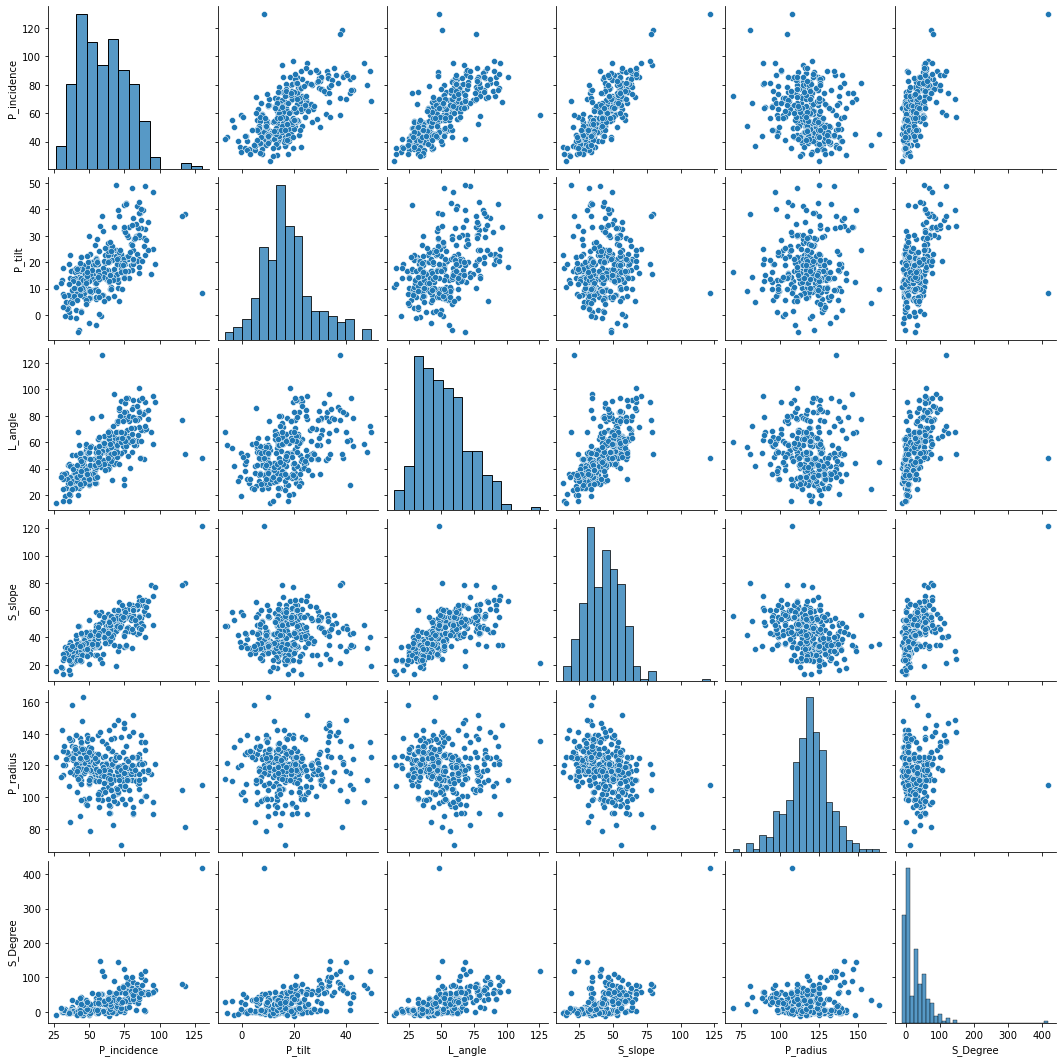

In [11]:
sns.pairplot(d)

In [12]:
print('The correlations in terms of values for the columns are:\n')
print(d.corr())
print('The pairs with high correlations are:\n')

The correlations in terms of values for the columns are:

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000
The pairs with high correlations are:



In [13]:
print('Only P_incidence and S_slope have high correlation')
d.corr()[d.corr().abs()>=0.8]

Only P_incidence and S_slope have high correlation


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.00000,NaN,NaN,0.81496,NaN,NaN
P_tilt,NaN,1.0,NaN,NaN,NaN,NaN
L_angle,NaN,NaN,1.0,NaN,NaN,NaN
S_slope,0.81496,NaN,NaN,1.00000,NaN,NaN
P_radius,NaN,NaN,NaN,NaN,1.0,NaN
S_Degree,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
#Mean and Median are almost same in all columns, even when grouped Class wise
print(d.describe().loc[['mean','50%']])
d.groupby('Class').describe().loc(axis=1)[:,['mean','50%']]
#S_Degree of Type_S alone contains large values compared to other 2 Classes

      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
mean    60.496653  17.542822  51.930930  42.953831  117.920655  26.296694
50%     58.691038  16.357689  49.562398  42.404912  118.268178  11.767934


P_incidence                P_tilt               L_angle             \
              mean        50%       mean        50%       mean        50%   
Class                                                                       
Normal   51.685244  50.123115  12.821414  13.482435  43.542605  42.638923   
Type_H   47.638407  46.416169  17.398795  16.949285  35.463524  35.164873   
Type_S   71.514224  72.149306  20.748038  19.309548  64.110108  62.555200   

          S_slope               P_radius               S_Degree             
             mean        50%        mean         50%       mean        50%  
Class                                                                       
Normal  38.863830  37.059694  123.890834  123.874328   2.186572   1.152710  
Type_H  30.239612  30.000659  116.474968  116.696146   2.480251   2.542441  
Type_S  50.766186  50.751695  114.518810  114.842400  51.896687  42.372509

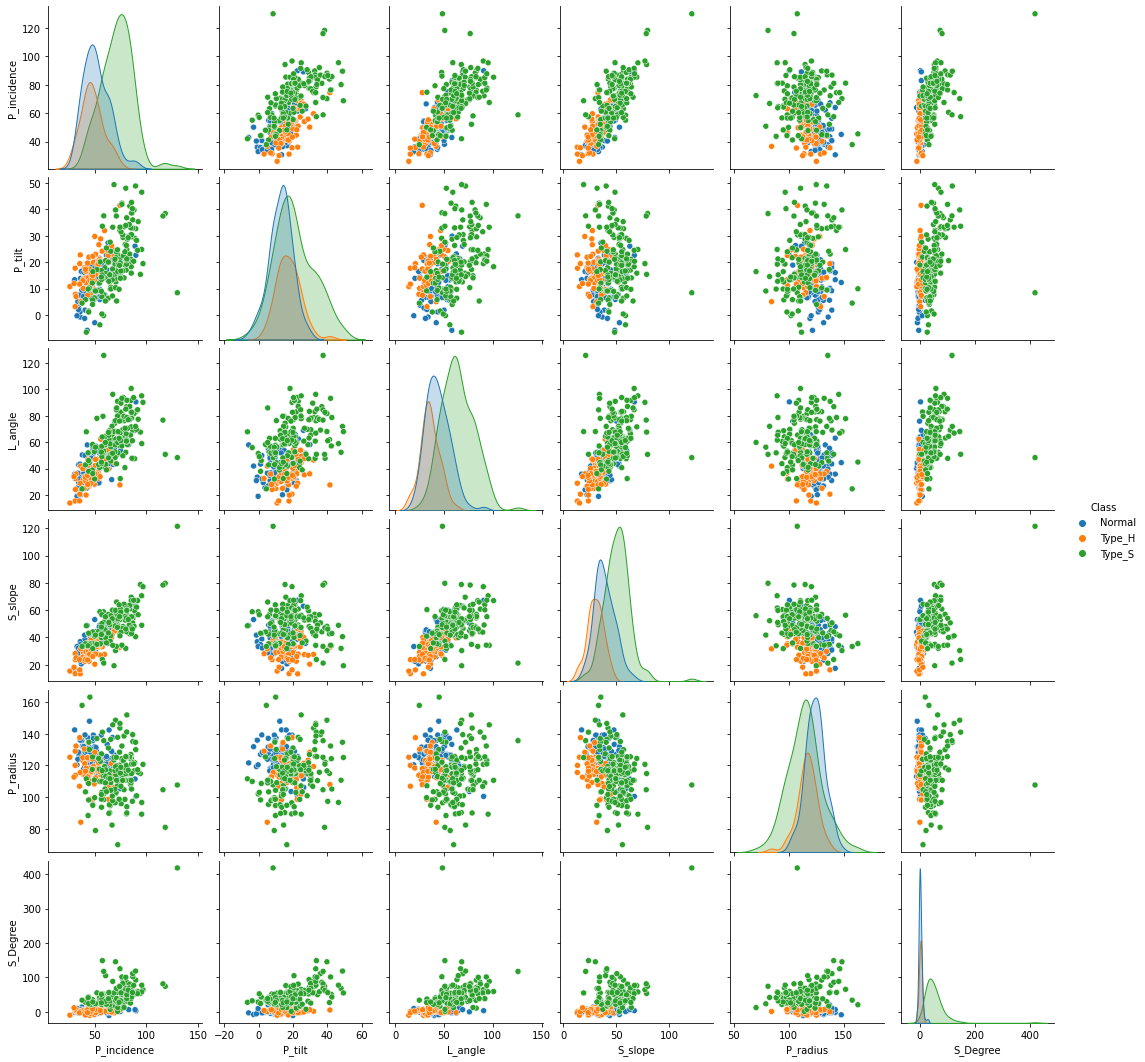

In [15]:
sns.pairplot(d,hue='Class')

In [16]:
#4. Data pre-processing:
#Imputing outliers with mean value instead of deleting entire corresponding row

col=[]
for i in d.drop('Class',axis=1).columns:
    col.append(str(i))
for i in col:
    Q1,Q3=np.quantile(d[i],0.25),np.quantile(d[i],0.75)
    IQR=Q3-Q1
    L,U=Q1-1.5*IQR,Q3+1.5*IQR
    Outliers=[t for t in d[i] if t<L or t>U]
    print(f'Number of outliers in {i}: {len(Outliers)}')
    m=d[i].loc[(d[i]>=L) & (d[i]<=U)].mean()
    d[i][(d[i]<L) | (d[i]>U)]=m
d

Number of outliers in P_incidence: 3
Number of outliers in P_tilt: 13
Number of outliers in L_angle: 1
Number of outliers in S_slope: 1
Number of outliers in P_radius: 11
Number of outliers in S_Degree: 10


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,16.572528,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d.Class=le.fit_transform(d.Class)
d.Class.unique()

array([0, 1, 2])

In [18]:
d.Class=d.Class.astype('category')
X=d.drop('Class',axis=1)
y=d.Class

In [19]:
from scipy.stats import zscore
X=X.apply(zscore)
X

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.327891,4.669615e-02,-0.918928,-1.674494,0.845063,-0.564239
1,-0.309155,2.855749e-01,-0.005022,-0.533986,0.687323,-0.801833
2,-0.964397,-9.090966e-01,-0.265490,-0.576354,0.985281,-0.683035
3,-0.718864,1.048414e-01,-0.204638,-0.936457,0.964054,-0.917457
4,-0.881282,-7.047491e-01,-0.505168,-0.606042,1.069849,-1.015828
...,...,...,...,...,...,...
305,1.254158,2.070372e+00,1.851772,0.274555,0.664979,3.100103
306,2.207922,-2.964212e-15,0.405053,0.493061,-1.888012,2.186690
307,0.880758,2.683273e-01,1.349085,0.994868,0.913313,2.032072
308,1.723791,4.521095e-01,2.335136,1.947897,0.254448,2.164759


In [20]:
y.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [21]:
print('There is high level of target imbalance since one class has 2.5 times more data than the other.')
print('This leads to lesser accuracy in test data in the class with lesser distribution.')

There is high level of target imbalance since one class has 2.5 times more data than the other.
This leads to lesser accuracy in test data in the class with lesser distribution.


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
#5. Model training, testing and tuning:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(5)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test))

Accuracy on Training data: 0.8755760368663594
Accuracy on Test data: 0.7741935483870968


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[19,  5,  4],
       [ 7, 10,  0],
       [ 4,  1, 43]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))
print('\nAs predicted, the scores are better for Class 2 due to imbalance in distribution')

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.62      0.59      0.61        17
           2       0.91      0.90      0.91        48

    accuracy                           0.77        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.77      0.78        93


As predicted, the scores are better for Class 2 due to imbalance in distribution


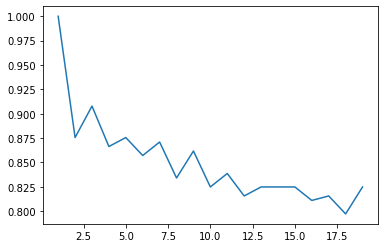

In [26]:
train_score=[]
test_score=[]
for k in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors= k) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
plt.plot(range(1,20),train_score)

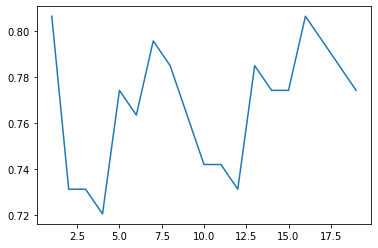

In [27]:
plt.plot(range(1,20),test_score)

In [28]:
print('When comparing the 2 graphs, there are mutual peaks for k value of 1 and 7.')
print('Since k=1 will lead to overfitting in larger test dataset, k=7 is the best value to opt.\n')
KNN=KNeighborsClassifier(7)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print('k=7')
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test))
print(classification_report(y_test,y_pred))
print('\nKNN model with K=7 can be chosen as the final model.')

When comparing the 2 graphs, there are mutual peaks for k value of 1 and 7.
Since k=1 will lead to overfitting in larger test dataset, k=7 is the best value to opt.

k=7
Accuracy on Training data: 0.8709677419354839
Accuracy on Test data: 0.7956989247311828
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.67      0.71      0.69        17
           2       0.91      0.88      0.89        48

    accuracy                           0.80        93
   macro avg       0.76      0.77      0.76        93
weighted avg       0.80      0.80      0.80        93


KNN model with K=7 can be chosen as the final model.


### 6. Conclusion and improvisation:
KNN model with K=8 has quite balanced performance in train and test data, hence there will not be overfitting.
Since the scores are quite good in both datasets, there will not be underfitting too.
Almost all independent paramters have normal distribution.

A description about the parameters in the dataset could have been provided, so that domain knowledge in the particular medical field can be applied to tune the model better by eliminating improbable values/cases, creating new parameters by combining multiple parameters, dropping parameters that can't have any effect on the dependant variable, etc.

# Part Two

In [29]:
#1. Import and warehouse data
d1=pd.read_csv('Part2 - Data1.csv')
print(d1.shape,'\n')
d1

(5000, 8) 



,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [30]:
d2=pd.read_csv('Part2 -Data2.csv')
print(d2.shape,'\n')
d2

(5000, 7) 



,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [31]:
d=pd.merge(d1,d2,on='ID',how='inner').set_index('ID')
print(d.shape,'\n')
d

(5000, 13) 



,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0


In [32]:
#2. Data cleansing:
d.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [33]:
#since the missing values are present only in target variable and are just 0.4% of the data, those values can be dropped.
d.drop(d[d.LoanOnCard.isnull()==True].index,inplace=True)
d

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0


In [34]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 10 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   ZipCode              4980 non-null   int64  
 4   HiddenScore          4980 non-null   int64  
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   int64  
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   int64  
 9   FixedDepositAccount  4980 non-null   int64  
 10  InternetBanking      4980 non-null   int64  
 11  CreditCard           4980 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 544.7 KB


In [35]:
d.nunique()

Age                     45
CustomerSince           47
HighestSpend           162
ZipCode                467
HiddenScore              4
MonthlyAverageSpend    108
Level                    3
Mortgage               347
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
LoanOnCard               2
dtype: int64

In [36]:
#Zipcode can be dropped since it is like nominal data and has 467 unique values
d.drop('ZipCode',axis=1,inplace=True)

In [37]:
d[d.columns[d.nunique()<5]]
#These values can be converted to catergorical data after completing visualization. Else some plots won't work as intended.

,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,
10,1,3,0,0,0,0,1.0
11,4,3,0,0,0,0,0.0
12,3,2,0,0,1,0,0.0
13,2,3,1,0,0,0,0.0
14,4,2,0,0,1,0,0.0
...,...,...,...,...,...,...,...
4996,1,3,0,0,1,0,0.0
4997,4,1,0,0,1,0,0.0
4998,2,3,0,0,0,0,0.0


In [38]:
#3. Data analysis & visualisation:
d.describe(include='all')

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,11.464212,11.468716,46.07009,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,23.000000,-3.000000,8.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.00000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


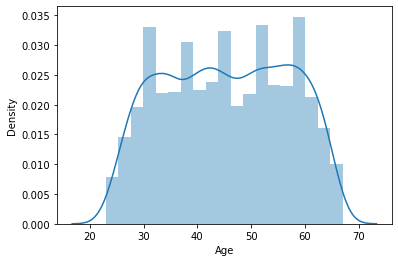

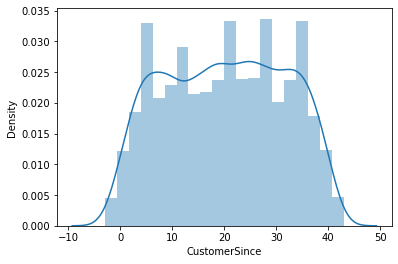

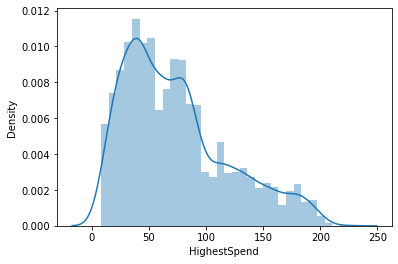

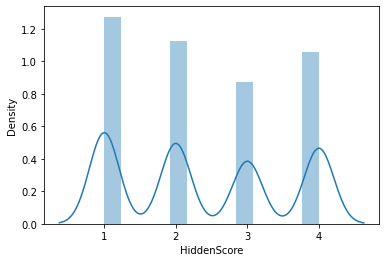

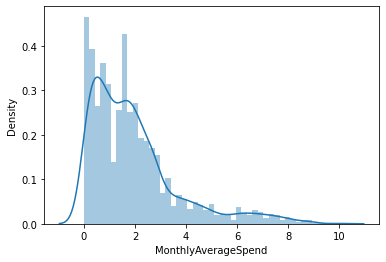

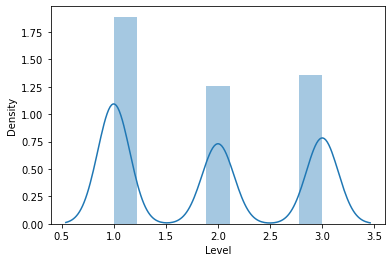

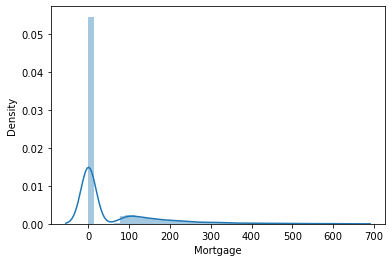

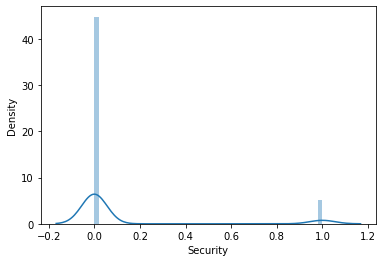

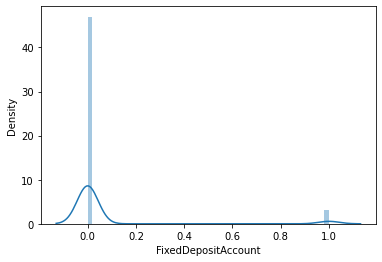

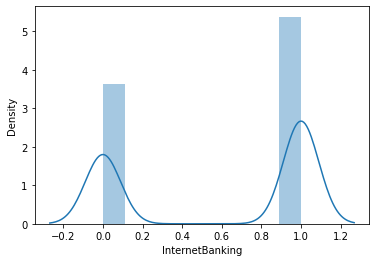

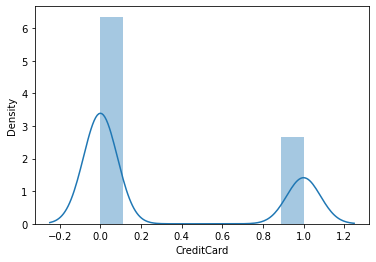

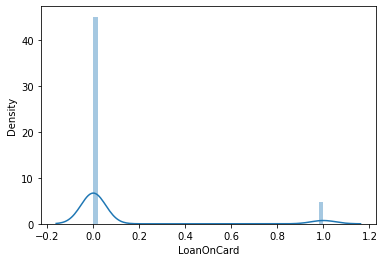

In [39]:
for i in d.columns:
    sns.distplot(d[i])
    plt.show()

In [40]:
#From above visualization of CustomerSince variable, it can be seen that there are some negative values, which is not logically possible for any unit, unless it is a z score.
#Assuming the data were incorrectly marked as negative, it can be converted to positive values
print(d[d.CustomerSince<0].shape,'\n')
d.CustomerSince=d.CustomerSince.abs()
print('\n',d[d.CustomerSince<0].shape,'\n')

(51, 12) 


 (0, 12) 



It is observed that the numerical data are almost normally distributed, mostly with low kurtosis.

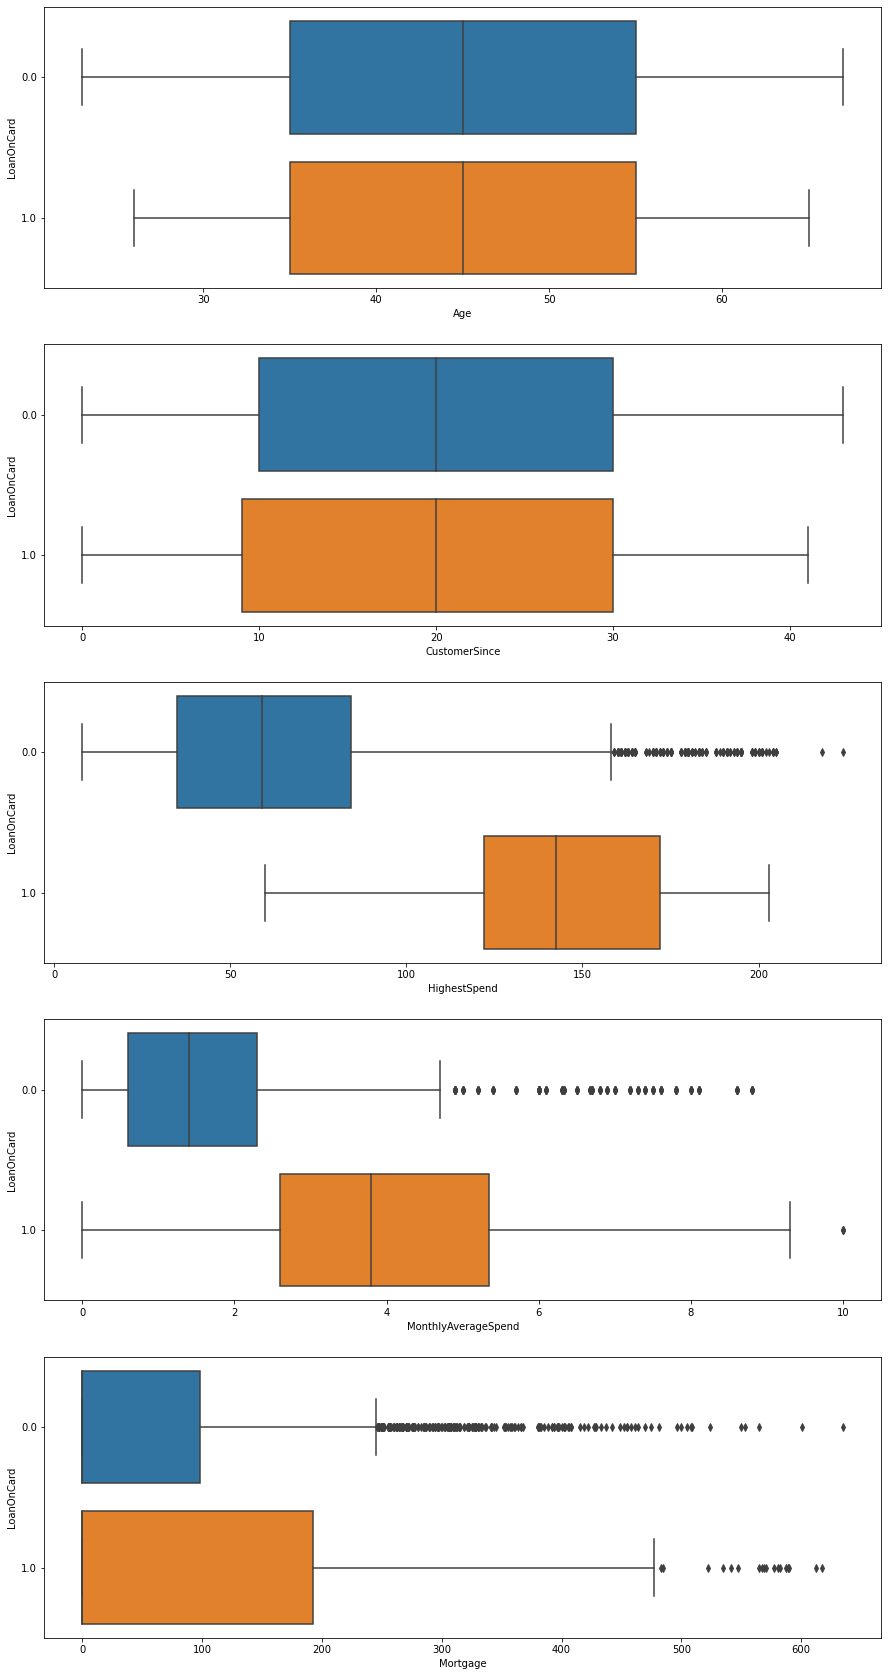

In [41]:
f,a=plt.subplots(5,figsize=(15,30))
for i in range(5):
    sns.boxplot(x=d.columns[d.nunique()>=5][i],y='LoanOnCard',data=d,ax=a[i],orient='h')
plt.show()

Age and CustomerSince doesn't have outliers. Distribution of Age and CustomerSince doesn't seem to differ based on LoanOnCard.
It can also be seen that people who are relatively very young or very old don't have LoanOnCard.  

There is huge difference in HighestSpend based on LoanOnCard. The HighestSpend is much higher for people with LoanOnCard.  

Same in the case of MonthyAverageSpend, with reduced difference compared to HighestSpend.  

Most people seem to have less mortgage, but the mortgage distribution is doubled for people with LoanOnCard.

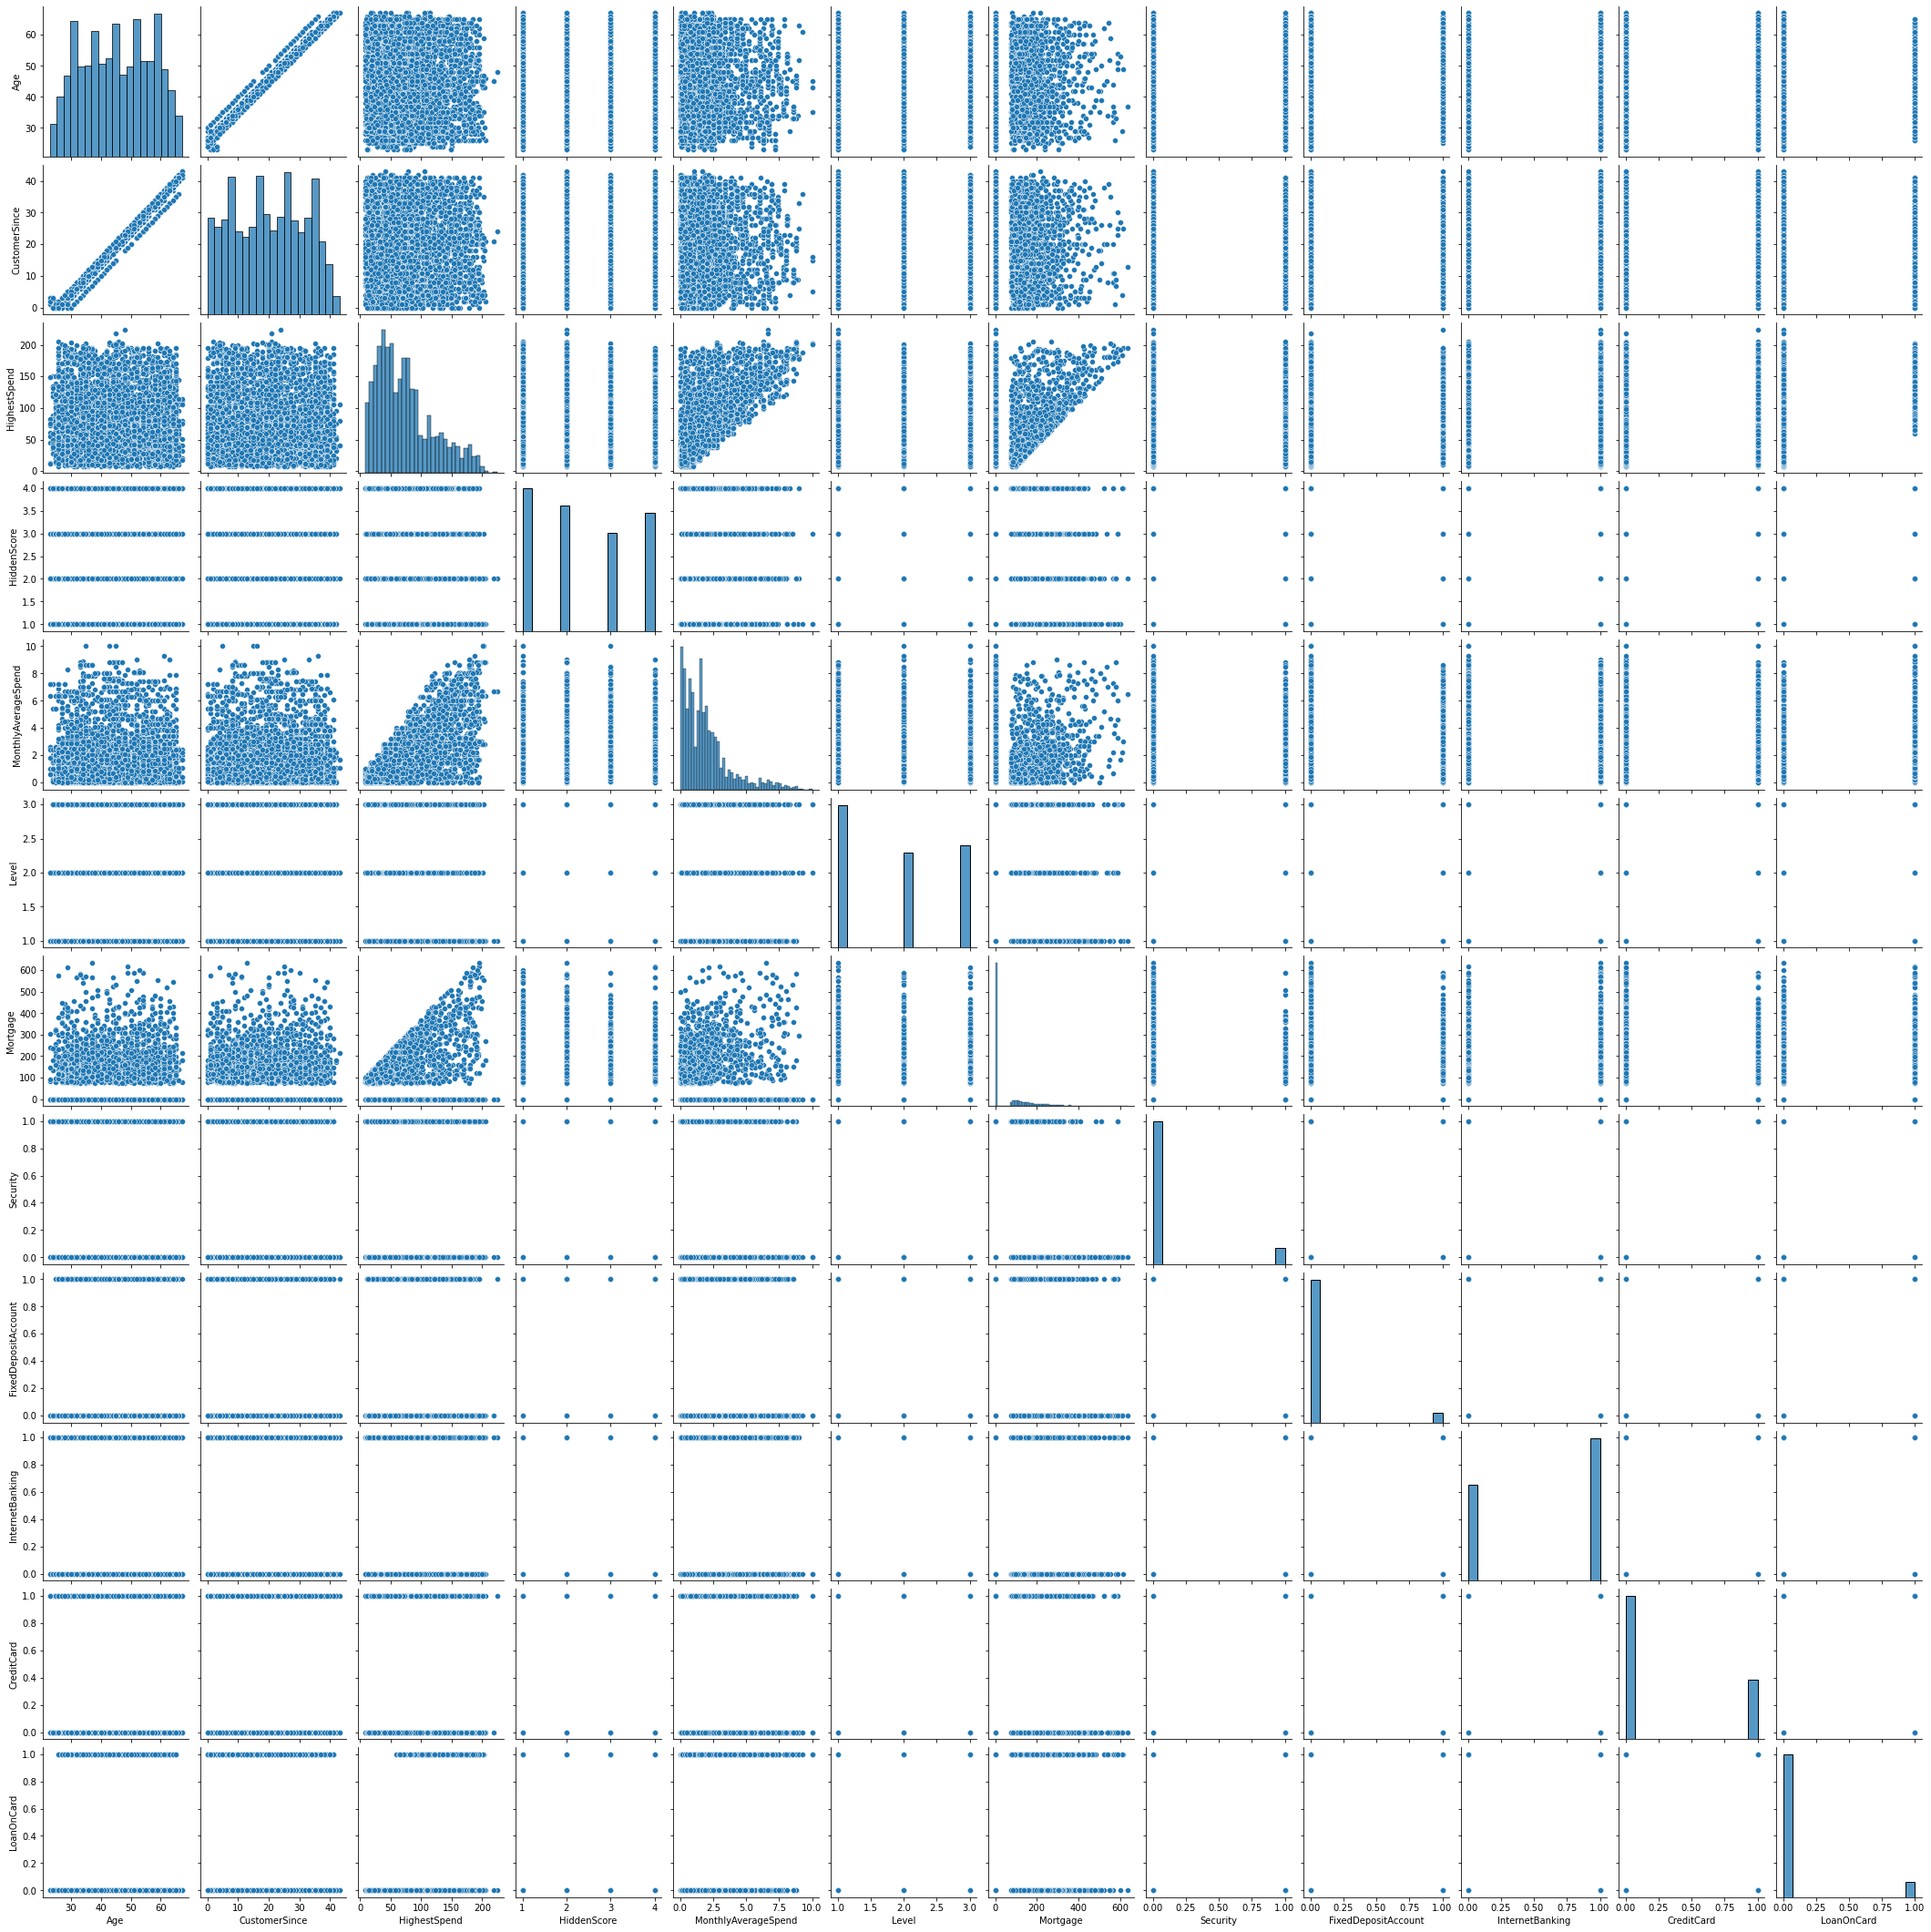

In [42]:
sns.pairplot(d)

In [43]:
d.corr()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.993984,-0.054951,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.993984,1.000000,-0.046424,-0.050780,-0.049585,0.015274,-0.011883,-0.000210,0.009470,0.011537,0.008604,-0.008687
HighestSpend,-0.054951,-0.046424,1.000000,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
HiddenScore,-0.045289,-0.050780,-0.158357,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.051896,-0.049585,0.646109,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.042750,0.015274,-0.188909,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.013272,-0.011883,0.207236,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,0.000323,-0.000210,-0.002284,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.009470,0.169535,0.014327,0.136410,0.013982,0.089167,0.317673,1.000000,0.176082,0.278924,0.316131
InternetBanking,0.011227,0.011537,0.014202,0.010900,-0.003475,-0.014556,-0.007044,0.014007,0.176082,1.000000,0.004960,0.006034


In [44]:
#Since Age and CustomerSince has very high correlation, one of the variables can be dropped.
#Dropping CustomerSince variable is preferred as it had some incorrect negative data.
d.drop('CustomerSince',axis=1,inplace=True)

In [45]:
for i in d.columns[d.nunique()<5]:
    d[i]=d[i].astype('category')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 10 to 5000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   HighestSpend         4980 non-null   int64   
 2   HiddenScore          4980 non-null   category
 3   MonthlyAverageSpend  4980 non-null   float64 
 4   Level                4980 non-null   category
 5   Mortgage             4980 non-null   int64   
 6   Security             4980 non-null   category
 7   FixedDepositAccount  4980 non-null   category
 8   InternetBanking      4980 non-null   category
 9   CreditCard           4980 non-null   category
 10  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(3)
memory usage: 389.3 KB


In [46]:
#4. Data pre-processing:
#Imputing outliers of numerical variables with mean value instead of deleting entire corresponding row
col = list(d.columns[d.nunique()>=5])
for i in col:
    Q1,Q3=np.quantile(d[i],0.25),np.quantile(d[i],0.75)
    IQR=Q3-Q1
    L,U=Q1-1.5*IQR,Q3+1.5*IQR
    Outliers=[t for t in d[i] if t<L or t>U]
    print(f'Number of outliers in {i}: {len(Outliers)}')
    m=d[i].loc[(d[i]>=L) & (d[i]<=U)].median()
    d[i][(d[i]<L) | (d[i]>U)]=m
d

Number of outliers in Age: 0
Number of outliers in HighestSpend: 96
Number of outliers in MonthlyAverageSpend: 324
Number of outliers in Mortgage: 291


,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,
10,34,180,1,1.5,3,0,0,0,0,0,1.0
11,65,105,4,2.4,3,0,0,0,0,0,0.0
12,29,45,3,0.1,2,0,0,0,1,0,0.0
13,48,114,2,3.8,3,0,1,0,0,0,0.0
14,59,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4996,29,40,1,1.9,3,0,0,0,1,0,0.0
4997,30,15,4,0.4,1,85,0,0,1,0,0.0
4998,63,24,2,0.3,3,0,0,0,0,0,0.0


In [47]:
from scipy.stats import zscore
X=d.drop('LoanOnCard',axis=1)
X[X.columns[X.nunique()>=5]]=X[X.columns[X.nunique()>=5]].apply(zscore) #Most units are unknown, zscore must be applied on numerical variables
y=d.LoanOnCard
X

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
ID,,,,,,,,,,
10,-0.990365,2.536657,1,-0.079748,3,-0.536805,0,0,0,0
11,1.713974,0.786204,4,0.702218,3,-0.536805,0,0,0,0
12,-1.426548,-0.614158,3,-1.296139,2,-0.536805,0,0,1,0
13,0.230950,0.996258,2,1.918609,3,-0.536805,1,0,0,0
14,1.190554,-0.730855,4,0.789103,2,-0.536805,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4996,-1.426548,-0.730855,1,0.267793,3,-0.536805,0,0,1,0
4997,-1.339312,-1.314339,4,-1.035484,1,0.737482,0,0,1,0
4998,1.539501,-1.104285,2,-1.122369,3,-0.536805,0,0,0,0


In [48]:
y.value_counts()
#There is huge imbalance in target variable. This will lead to bias in the model, which can be avoided using stratified split.
#Other methods of handling imbalanced data are either complex or lead to loss of many data in sampling.

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y_train.value_counts())
y_test.value_counts()

0.0    3159
1.0     327
Name: LoanOnCard, dtype: int64


0.0    1341
1.0     153
Name: LoanOnCard, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y) #Stratified sampling
print(y_train.value_counts())
y_test.value_counts()
#This sampling gives exactly the same imbalance ratio in test and train dataset as in the original dataset, also retains originality.

0.0    3150
1.0     336
Name: LoanOnCard, dtype: int64


0.0    1350
1.0     144
Name: LoanOnCard, dtype: int64

In [51]:
#5. Model training, testing and tuning:

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
print('Train accuracy:',accuracy_score(y_train,logmodel.predict(X_train)))

Train accuracy: 0.9529546758462422


In [53]:
predict = logmodel.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,predict))

Test accuracy: 0.9464524765729585


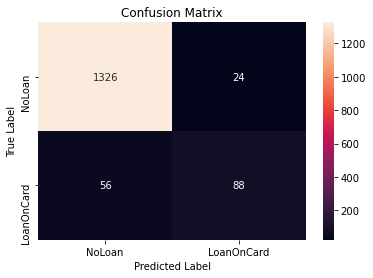

In [54]:
cm = confusion_matrix(y_test, predict)
class_label = ["NoLoan", "LoanOnCard"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1350
         1.0       0.79      0.61      0.69       144

    accuracy                           0.95      1494
   macro avg       0.87      0.80      0.83      1494
weighted avg       0.94      0.95      0.94      1494



In [56]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [57]:
print('Train accuracy:',accuracy_score(y_train,nb_model.predict(X_train)))

Train accuracy: 0.9050487664945496


In [58]:
predict_nb = nb_model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,predict_nb))

Test accuracy: 0.9123159303882196


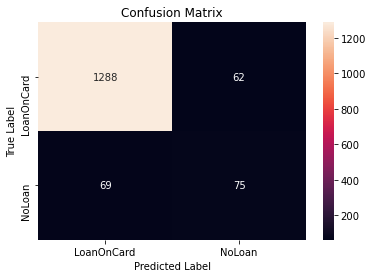

In [59]:
cm = confusion_matrix(y_test, predict_nb)
class_label = ["LoanOnCard", "NoLoan"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1350
         1.0       0.55      0.52      0.53       144

    accuracy                           0.91      1494
   macro avg       0.75      0.74      0.74      1494
weighted avg       0.91      0.91      0.91      1494



The results are better for Logistic regression model as all the scores are greater compared to Naive Bayes model, hence it can be chosen as final model.

6.Conclusion and improvisation: 

The logisitic regression model has greater accuracy in both test and train dataset, and has all scores better than Naive Bayes model. Hence this model can be used to analyse the parameters that affect the customers' behavior in opting for a loan in credit card.


Meanings of some of the columns have not been provided.  
Some of the columns have units masked.  
These details could have been provided with confidentaility to improve the tuning of input paramters through better Exploratory Data Analysis backed up with domain knowledge.  
Details about credit scores of the customer, and details about family members, like their age and whether they have account in the bank could also be provided.